In [44]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\Customers.csv")
products = pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\Products.csv")
transactions = pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\Transactions.csv")

# Merge Customers and Transactions on CustomerID
customer_transactions = pd.merge(transactions, customers, on="CustomerID", how="left")

# Merge the result with Products on ProductID
full_data = pd.merge(customer_transactions, products, on="ProductID", how="left")

# Check the combined dataset
print(full_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

Region
Asia             44
Europe           50
North America    46
South America    59
Name: CustomerID, dtype: int64


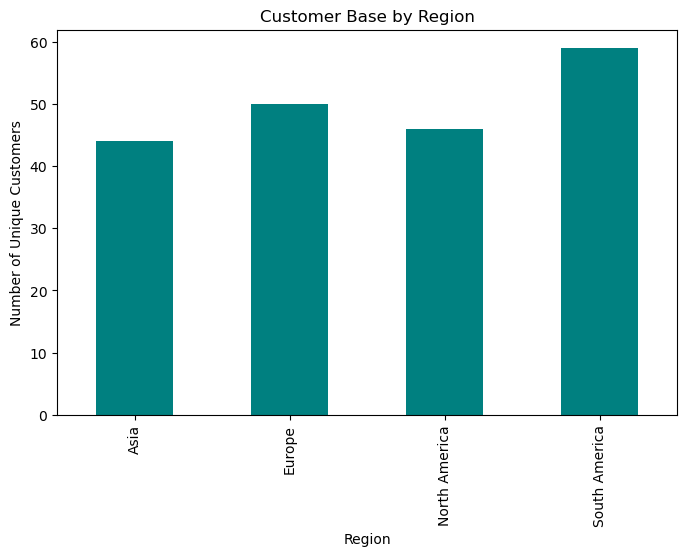

In [62]:
# Count the number of unique customers by region
customer_base_by_region = full_data.groupby("Region")["CustomerID"].nunique()
print(customer_base_by_region)
# Generate the bar chart for customer base by region
plt.figure(figsize=(8, 5))
customer_base_by_region.plot(kind="bar", color="teal")
plt.title("Customer Base by Region")
plt.xlabel("Region")
plt.ylabel("Number of Unique Customers")
plt.show()


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


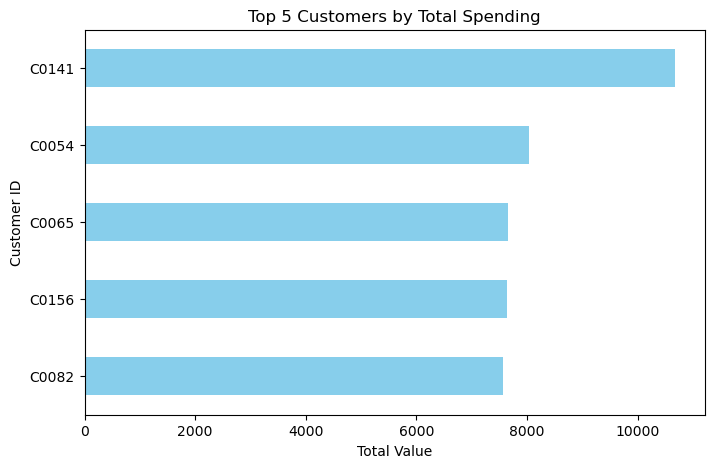

In [69]:
import matplotlib.pyplot as plt

# Calculate total spending per customer
customer_spending = full_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)
print(customer_spending.head())
# Filter top 5 customers
top_5_customers = customer_spending.head(5)

# Generate the horizontal bar chart
plt.figure(figsize=(8, 5))
top_5_customers.plot(kind="barh", color="skyblue")
plt.title("Top 5 Customers by Total Spending")
plt.xlabel("Total Value")
plt.ylabel("Customer ID")
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest spender on top
plt.show()


Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


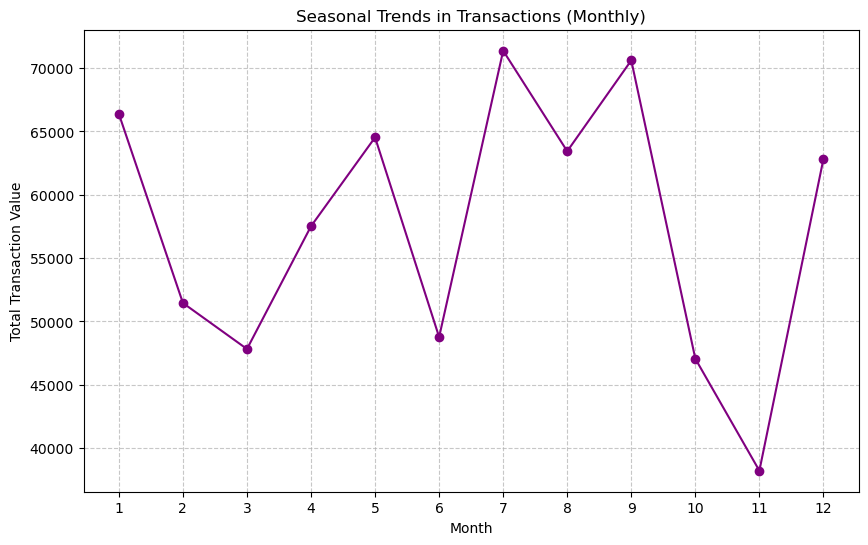

In [59]:
import matplotlib.pyplot as plt

# Extract the month from the TransactionDate and calculate the total value per month
full_data["TransactionDate"] = pd.to_datetime(full_data["TransactionDate"])
full_data["Month"] = full_data["TransactionDate"].dt.month
monthly_trends = full_data.groupby("Month")["TotalValue"].sum()
print(monthly_trends)
# Generate the line chart
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind="line", marker="o", color="purple")
plt.title("Seasonal Trends in Transactions (Monthly)")
plt.xlabel("Month")
plt.ylabel("Total Transaction Value")
plt.xticks(range(1, 13))  # Ensure all months are labeled
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Category       Books  Clothing  Electronics  Home Decor
Region                                                 
Asia             120       166          132         142
Europe           165       119          144         167
North America    155       147          153         138
South America    241       158          198         192


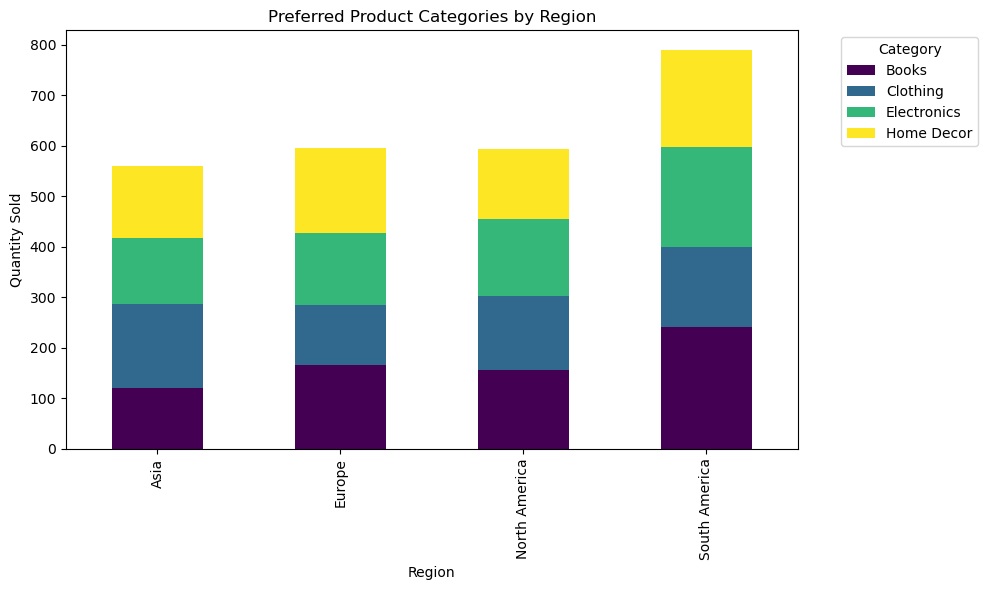

In [63]:
# Calculate quantity sold for each category by region
region_category = full_data.groupby(["Region", "Category"])["Quantity"].sum().unstack()
print(region_category)
# Generate the stacked bar chart
region_category.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Preferred Product Categories by Region")
plt.xlabel("Region")
plt.ylabel("Quantity Sold")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


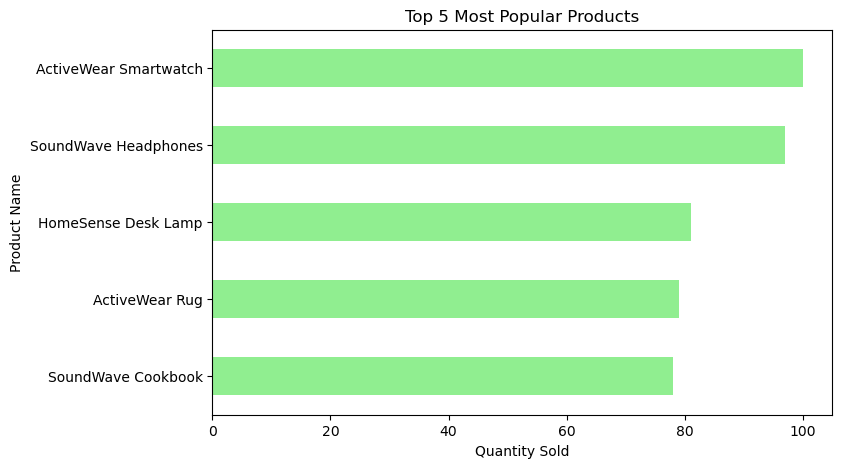

In [66]:

popular_products = full_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
print(popular_products.head())
# Filter the top 5 most popular products
top_5_products = popular_products.head()

# Generate the horizontal bar chart
plt.figure(figsize=(8, 5))
top_5_products.plot(kind="barh", color="lightgreen")
plt.title("Top 5 Most Popular Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()  # Show the most popular product at the top
plt.show()


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


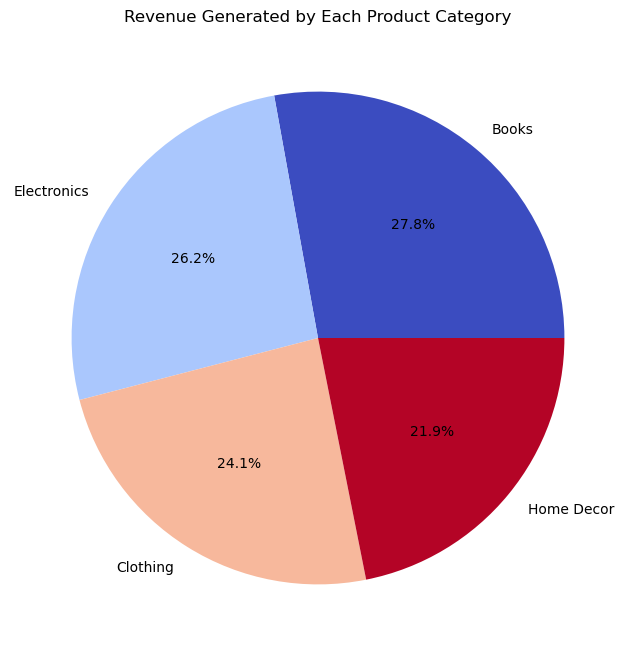

In [68]:
import matplotlib.pyplot as plt

# Calculate the total revenue for each category
category_revenue = full_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print(category_revenue)
# Generate the pie chart
plt.figure(figsize=(8, 8))
category_revenue.plot(kind="pie", autopct="%1.1f%%", colormap="coolwarm")
plt.title("Revenue Generated by Each Product Category")
plt.ylabel("")  # Remove the default ylabel for a cleaner look
plt.show()

